## 1. import data and libraries ##

In [1]:
import time
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn import metrics
from sklearn.metrics import r2_score
import xgboost


# 시각화를 위한 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)

from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.naive_bayes import *  # 나이브베이즈 분류 알고리즘 제공
from sklearn.neural_network import *  # 인공신경망 분류 알고리즘 제공
from sklearn.tree import *  # 결정트리 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공


# statsmodels 패키지
import statsmodels.api as sm
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지
#
####################################################################################

In [2]:
col_names = ['house_code','house_No','house_type','region', 'supply_type','house_area','household',
              'empty_house','cert_type','deposit','rent','walk_sub','walk_bus','parkinglot','car_no']
dr = pd.read_csv('train.csv', names = col_names)
df = dr
df = df.iloc[1:]

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 1 to 2952
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   house_code   2952 non-null   object
 1   house_No     2952 non-null   object
 2   house_type   2952 non-null   object
 3   region       2952 non-null   object
 4   supply_type  2952 non-null   object
 5   house_area   2952 non-null   object
 6   household    2952 non-null   object
 7   empty_house  2952 non-null   object
 8   cert_type    2952 non-null   object
 9   deposit      2383 non-null   object
 10  rent         2383 non-null   object
 11  walk_sub     2741 non-null   object
 12  walk_bus     2948 non-null   object
 13  parkinglot   2952 non-null   object
 14  car_no       2952 non-null   object
dtypes: object(15)
memory usage: 346.1+ KB


,house_code,house_No,house_type,region,supply_type,house_area,household,empty_house,cert_type,deposit,rent,walk_sub,walk_bus,parkinglot,car_no
1,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,C2532,239,아파트,강원도,국민임대,49.2,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2951,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


## 2. EDA ##

In [4]:
## string Replace and check data type ##
df = df.replace('-', np.NaN)
df[['house_No', 'house_area', 'household', 'empty_house', 'deposit', 'rent', 'walk_sub', 'walk_bus', 'parkinglot', 'car_no']] = df[['house_No', 'house_area', 'household', 'empty_house', 'deposit', 'rent', 'walk_sub', 'walk_bus', 'parkinglot', 'car_no']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 1 to 2952
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   house_code   2952 non-null   object 
 1   house_No     2952 non-null   int64  
 2   house_type   2952 non-null   object 
 3   region       2952 non-null   object 
 4   supply_type  2952 non-null   object 
 5   house_area   2952 non-null   float64
 6   household    2952 non-null   int64  
 7   empty_house  2952 non-null   float64
 8   cert_type    2952 non-null   object 
 9   deposit      2371 non-null   float64
 10  rent         2362 non-null   float64
 11  walk_sub     2741 non-null   float64
 12  walk_bus     2948 non-null   float64
 13  parkinglot   2952 non-null   float64
 14  car_no       2952 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 346.1+ KB


In [5]:
## Column 별 na 개수 확인 ##
df.isna().sum()

house_code       0
house_No         0
house_type       0
region           0
supply_type      0
house_area       0
household        0
empty_house      0
cert_type        0
deposit        581
rent           590
walk_sub       211
walk_bus         4
parkinglot       0
car_no           0
dtype: int64

In [6]:
# Object 형태의 Data 분포 확인 #
df1 = df.select_dtypes(include='object')
for c in df1.columns:
    print ("---- %s ---" % c)
    print (df1[c].value_counts())

---- house_code ---
C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2518     2
C2520     1
C2340     1
C2437     1
C2188     1
Name: house_code, Length: 423, dtype: int64
---- house_type ---
아파트    2390
상가      562
Name: house_type, dtype: int64
---- region ---
경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: region, dtype: int64
---- supply_type ---
국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: supply_type, dtype: int64
---- cert_type ---
A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: cert_type, dtype: int64


In [7]:
## house_code 가 겹치지 않게 데이터 고르기 ##
df = df.drop_duplicates('house_code', keep='last')

In [8]:
## na값 재확인 ##
df.isna().sum()

house_code      0
house_No        0
house_type      0
region          0
supply_type     0
house_area      0
household       0
empty_house     0
cert_type       0
deposit        34
rent           35
walk_sub       20
walk_bus        1
parkinglot      0
car_no          0
dtype: int64

In [9]:
## na 값 대체 ##

# 평균으로 대체 #
df['deposit'] = df['deposit'].fillna(df['deposit'].mean())
# 뒤의값으로 대체 (ffill,bfill,pad)#
df['rent'] = df['rent'].fillna(method = 'backfill')
df['walk_sub'] = df['walk_sub'].fillna(method = 'ffill')
# 결측치 있는 행 삭제(walk_bus Column na는 단 1개) #
df = df.dropna(axis=0)

In [10]:
#반올림하여 정수형 전환(house_area column) #
df['house_area'] = round(df['house_area'])

#만원 단위에서 반올림(deposit, rent column)
df['deposit'] = round(df['deposit'],-4)
df['deposit'] = round(df['rent'],-4)

In [11]:
## 면적별 그룹화 ##
bins = [0,47,52,57,62]
df['area_grp'] = np.digitize(df['house_area'],bins)

<AxesSubplot:xlabel='area_grp', ylabel='car_no'>

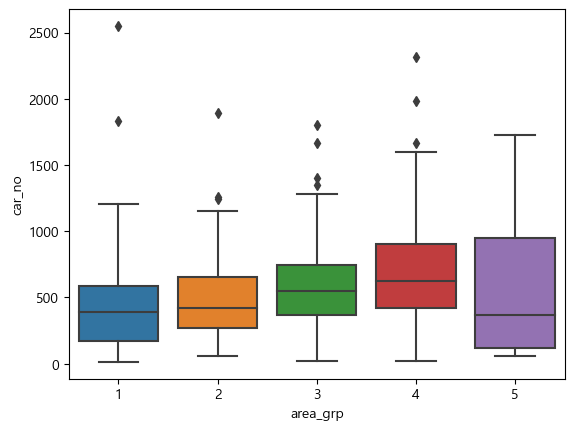

In [12]:
## 그룹별 차량 대수 boxplot ##
sns.boxplot(x="area_grp", y = "car_no", data = df)

In [13]:
## X column stratify하여 data 분할 ##
y = df['car_no']
x=df.drop(['car_no'], axis = 1)
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      stratify = x['area_grp'],
                                                      test_size = 0.3,
                                                      random_state = 0 )

print (x_train['area_grp'].value_counts())
print (x_test['area_grp'].value_counts())

3    75
4    71
1    60
2    52
5    37
Name: area_grp, dtype: int64
3    33
4    30
1    26
2    22
5    16
Name: area_grp, dtype: int64


## 3. Regression Data Preparation ##

In [14]:
## 수치형 데이터만 고르기 ##
df_new = df.select_dtypes(exclude='object')
df_new = df_new.drop(["area_grp"], axis = 1)
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
house_No,422.0,722.736967,406.007997,26.0,446.25,632.0,923.50,2568.0
house_area,422.0,66.040284,69.706312,23.0,47.00,52.0,60.00,583.0
household,422.0,110.992891,120.502244,1.0,28.00,75.0,154.25,960.0
empty_house,422.0,13.476303,10.397476,0.0,5.00,13.0,20.00,55.0
deposit,422.0,224052.132701,126614.709598,20000.0,150000.00,190000.0,277500.00,1060000.0
rent,422.0,223960.616114,126501.715580,23950.0,145222.50,194590.0,274892.50,1058030.0
walk_sub,422.0,0.135071,0.393839,0.0,0.00,0.0,0.00,3.0
walk_bus,422.0,3.699052,2.805991,0.0,2.00,3.0,4.00,20.0
parkinglot,422.0,591.623223,367.366461,13.0,319.25,522.0,798.50,1798.0
car_no,422.0,571.665877,391.253664,13.0,294.50,505.0,761.75,2550.0


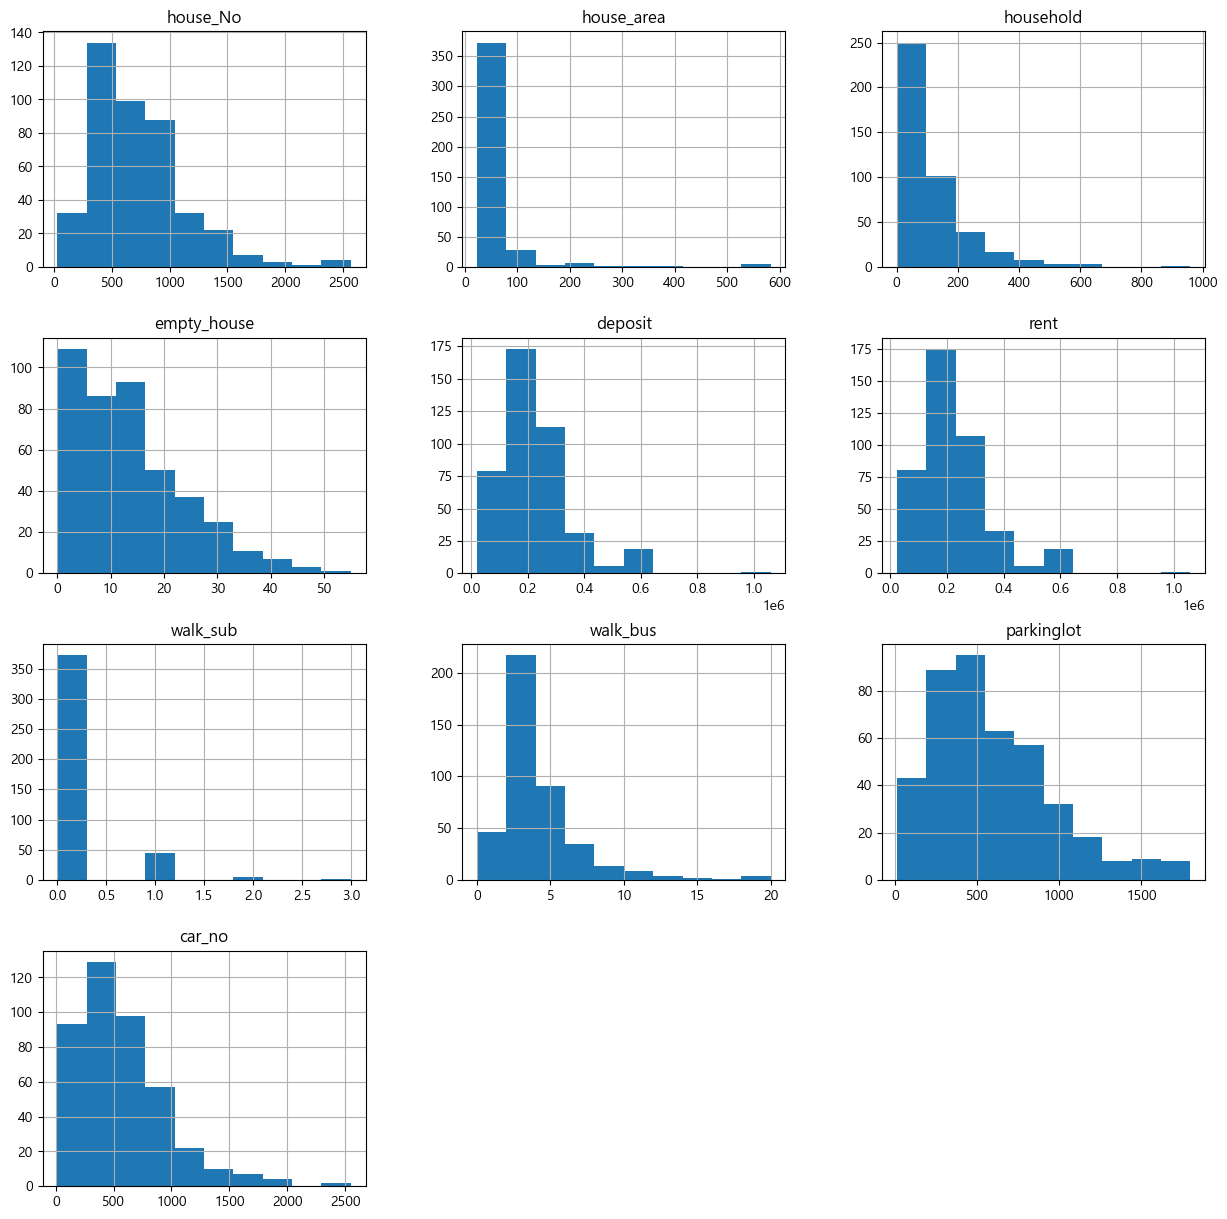

In [15]:
## 데이터 분포 ##
df_new.hist(figsize=(15,15))
plt.show()

In [16]:
## 정규성 검정 ##
for i in range(1, df_new.columns.size):
    print( 'shapiro-test p값', df_new.iloc[:,i].name, stats.shapiro( df_new.iloc[:,i] )[1] )

# 정규성 만족 Column 없음 #    

shapiro-test p값 house_area 2.4307607444244376e-36
shapiro-test p값 household 3.0908327573028255e-23
shapiro-test p값 empty_house 4.878256002274761e-13
shapiro-test p값 deposit 2.720760144363946e-19
shapiro-test p값 rent 3.090830152168572e-19
shapiro-test p값 walk_sub 1.6690385396830796e-35
shapiro-test p값 walk_bus 1.157749890613208e-25
shapiro-test p값 parkinglot 1.6448391043297206e-12
shapiro-test p값 car_no 3.2393995797429243e-15


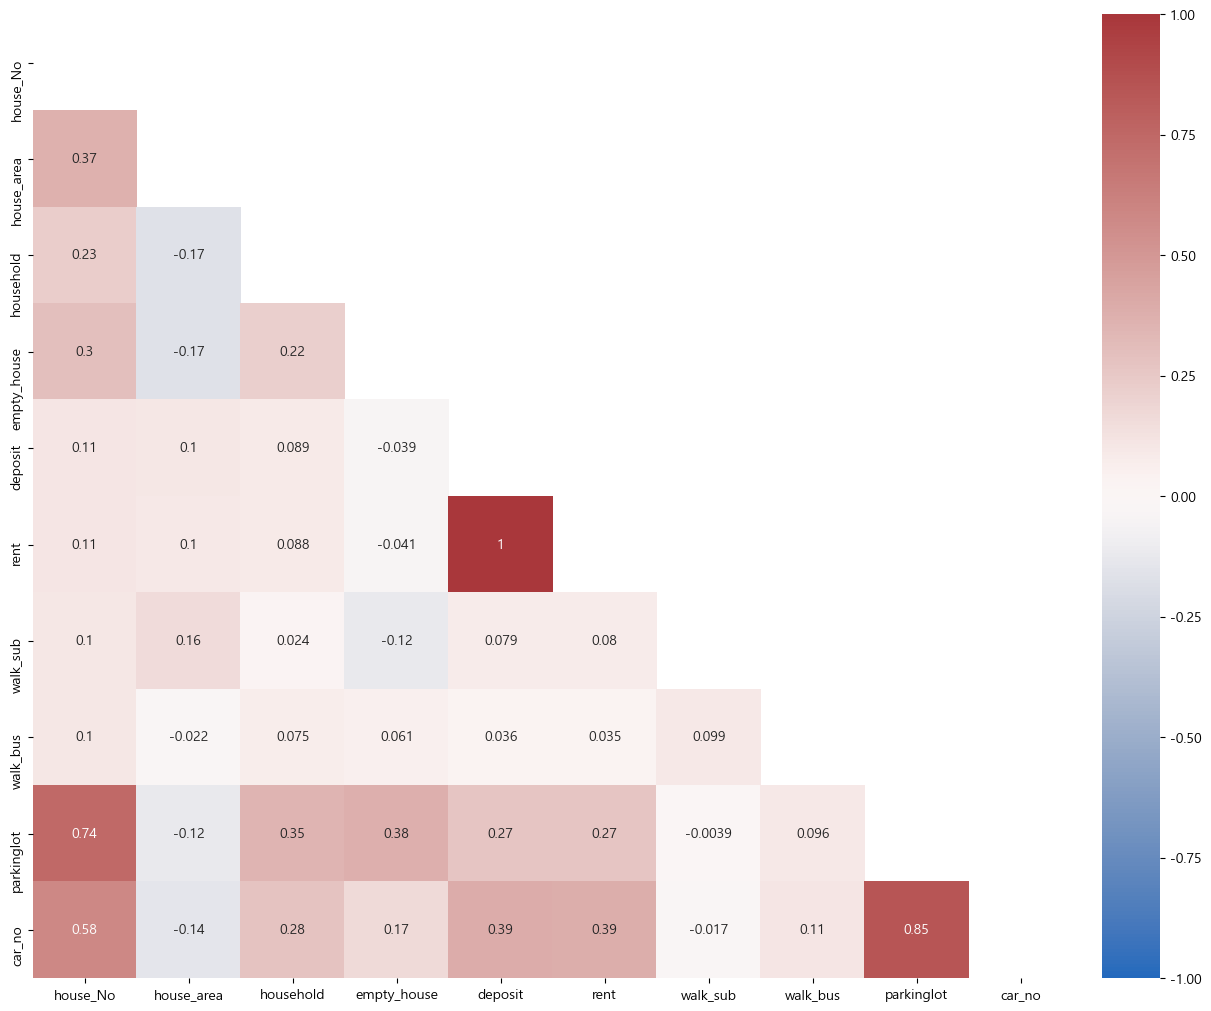

In [17]:
## 수치형 변수간 Cor 시각화 ##
df_new_corr = df_new.corr()
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like( df_new_corr, dtype=np.bool )
mask[ np.triu_indices_from( mask ) ] = True
# 히트맵 시각화
plt.figure(figsize=(12,10),
            constrained_layout = True)
sns.heatmap( df_new_corr,
            annot = True,
            cmap = 'vlag',  # https://seaborn.pydata.org/tutorial/color_palettes.html
            mask = mask,
            vmin = -1, vmax = 1, center = 0)
plt.show()
print()

In [18]:
## 이상치 Row 제거 ##

def IQR_Rule(val_list) :
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1
    
    not_outlier_cond = (Q3 + 1.5*IQR > val_list) & (Q1 - 1.5*IQR < val_list)
    return not_outlier_cond

conditions = IQR_Rule(df_new['deposit'])
conditions1 = IQR_Rule(df_new['rent'])
print(len(conditions[conditions == False]))
print(len(conditions1[conditions1 == False]))

df_new = df_new[conditions]
df_new = df_new[conditions1]

25
25


In [19]:
## 큰 데이터 단위 절삭 ##
df_new['deposit'] = df_new['deposit'] / 1000
df_new['rent'] = df_new['rent']/ 1000

In [20]:
## Split data into train & test set ##
y = df_new['car_no']
x = df_new.drop(['car_no'], axis = 1)
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.3,
                                                      shuffle = True,
                                                      random_state = 0 )

## 4. Build Reg. Model ##

### 4.1 OLS Reg ###

In [21]:
# Build OLS Model and check time ##
x_train_c = add_constant( x_train )
model = OLS( y_train, x_train_c )
start_time = time.time()
fit_model = model.fit()
ols_time = (time.time() - start_time)
print('ols time : ',ols_time)
print( fit_model.summary(alpha = 0.05) )

ols time :  0.08894848823547363
                            OLS Regression Results                            
Dep. Variable:                 car_no   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           4.95e-87
Time:                        08:58:19   Log-Likelihood:                -1824.2
No. Observations:                 277   AIC:                             3668.
Df Residuals:                     267   BIC:                             3705.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          70.

In [22]:
## Predict for test data and calculate accuracy ##

# x_test에 상수항 추가 (x_train 은 모델 생성할 때 이미 추가한 상태)
x_test_c = add_constant( x_test )

# 예측
pred_train = fit_model.fittedvalues  # 또는 fit_model.predict( x_train_c )
pred_test = fit_model.predict( x_test_c )

# 잔차 계산
resid_train = fit_model.resid  # ( y_train - pred_train )도 가능
resid_test = y_test - pred_test

# R-squared
r2_train = fit_model.rsquared  # r2_score( y_train, pred_train ) 또는 model.score( x_train, y_train )도 가능
r2_test = r2_score( y_test, pred_test )  # 또는 model.score( x_test, y_test )
print(r2_train,r2_test)

0.7966943392472057 0.5981674189474864


 - roc/auc는 tfr(Classification) 기반으로서 회귀에서 사용할 수 없는 지표
 - r2_test값이 r2_train보다 지나치게 작아 Overfitting 의심

### 4.2 DecisionTree Reg ###

In [23]:
regtree = DecisionTreeRegressor(max_depth=5)
start_time = time.time()
regtree_model =  regtree.fit(x_train, y_train)
tree_time = (time.time() - start_time)
pred_train = regtree_model.predict(x_train)
r2 = r2_score(y_train, pred_train)
pred_test = regtree_model.predict(x_test)
r2_1 = r2_score(y_test, pred_test)
print(tree_time)
print("train_r2 : ", r2)
print("test_r2 : ", r2_1)

0.006994962692260742
train_r2 :  0.8833385857382685
test_r2 :  0.3627912520794796


 - 역시 Overfitting이 의심되며 test set의 정확도가 매우 안좋음

### 4.3 XGB Reg ###

In [24]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
start_time = time.time()
xgb_model.fit(x_train,y_train)
xgb_time = (time.time() - start_time)
pred_train = xgb_model.predict(x_train)
r2 = r2_score(y_train, pred_train)
pred_test = xgb_model.predict(x_test)
r2_1 = r2_score(y_test, pred_test)
print(xgb_time)
print("train_r2 : ", r2)
print("test_r2 : ", r2_1)

97.042409658432
train_r2 :  0.9971506667660198
test_r2 :  0.36422130091307425


 - 위의 모델과 같음

### 4.4 Model Unfit 분석 ###

<AxesSubplot:ylabel='car_no'>

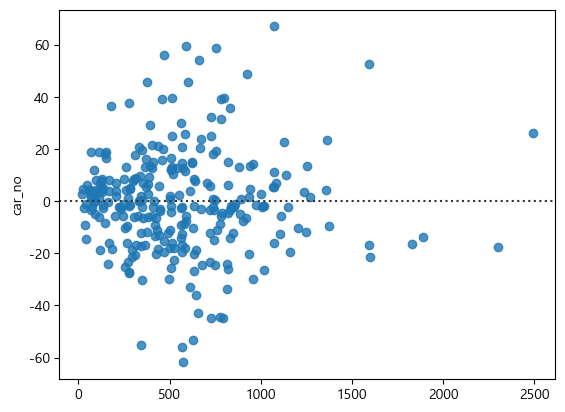

In [25]:
## Train Resid 분석
resid1 = y_train - pred_train
sns.residplot(pred_train,resid1)

<AxesSubplot:ylabel='car_no'>

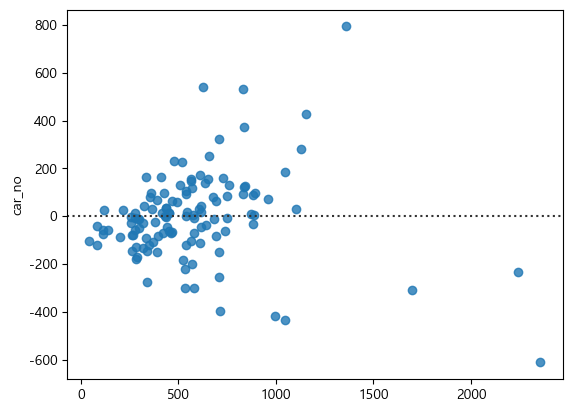

In [26]:
## Test Resid 분석
resid = y_test - pred_test
sns.residplot(pred_test,resid)

 - y의 값이 커질수록 오차도 커지는 현상. 데이터 log화 필요. 혹은 이차 변수 (x^2) 투입 고려

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

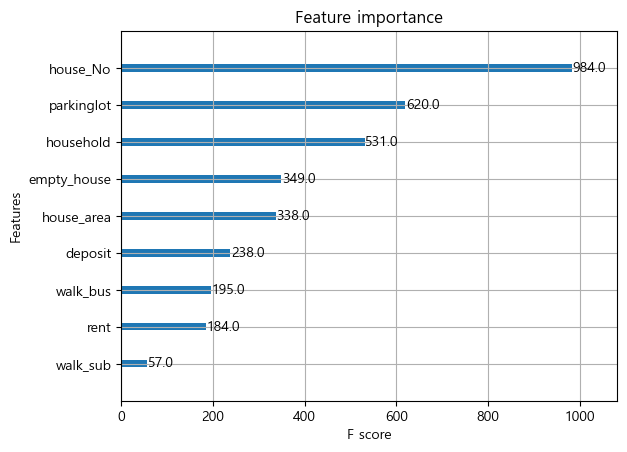

In [27]:
## 변수별 중요도 확인 ##
xgboost.plot_importance(xgb_model)